## Generating numbers from continuous distributions

We want to simulate data coming from continuous distributions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
plt.style.use("ggplot")

from scipy.stats import expon, norm
from scipy.stats import pareto as paret

from stochastics import take

### Continuous densities

Let us simulate some continuous distributions.

In [5]:
def exponential(lambd):
    while True:
        U = np.random.uniform(0, 1)
        x = -np.log(U)/lambd
        yield x

In [6]:
def pareto(beta, k):
    while True:
        U = np.random.uniform(0, 1)
        x = beta * (U**(-1/k) - 1)
        yield x

In [7]:
def box_muller_normal():
    while True:
        U1 = np.random.uniform(0, 1)
        U2 = np.random.uniform(0, 1)
        x = np.sqrt(-2*np.log(U1)) * np.cos(2 * np.pi * U2)
        yield x

In [44]:
def normal(): # Cannot easily control sigma; depends on n
    n = 4;
    U = np.random.uniform(0, 1, n)
    v = (np.sum(U) - n/2)
    return v

In [8]:
exp_generator = exponential(0.1)
pareto_generator = pareto(1, 2.5)
normal_generator = box_muller_normal()

/Users/jesperwohlerthansen/miniconda3/envs/base/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2289: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


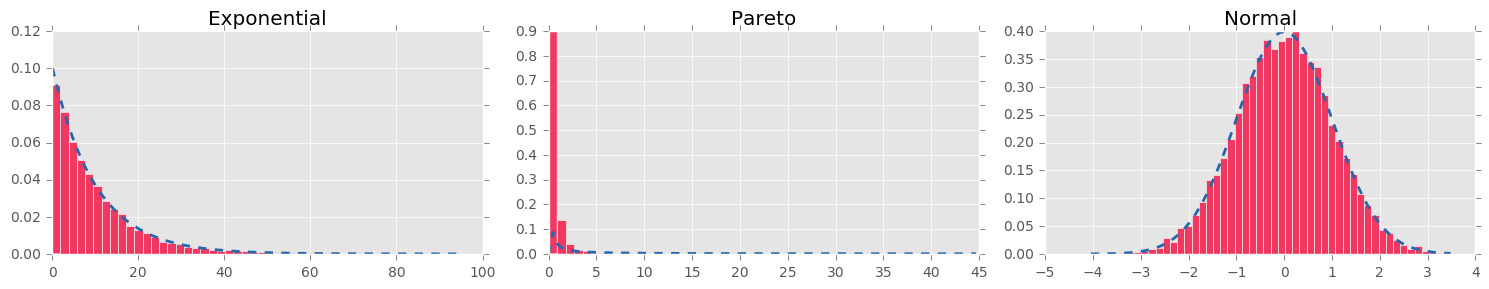

In [42]:
ind = np.arange(len(x))  # the x locations for the groups
width = 0.35             # the width of the bars

# Plot for the crude solution
fig, axarr = plt.subplots(1, 3, figsize=(15, 3))

# Exponential
F = take(exp_generator, n)
x = np.linspace(1e-1, max(F), 100)
fit = expon.pdf(x, 0.1, 10)

axarr[0].hist(F, normed=True, bins=50, color="#F03861")
axarr[0].plot(x, fit, color='#2866AB', linestyle="--", linewidth=2)
axarr[0].set_title("Exponential")

# Pareto
F = take(pareto_generator, n)
x = np.linspace(0, max(F), 100)
fit = paret.pdf(x, *paret.fit(F, floc=0))

axarr[1].hist(F, normed=True, bins=50, color="#F03861")
axarr[1].plot(x, fit, color='#2866AB', linestyle="--", linewidth=2)
axarr[1].set_title("Pareto")

# Normal
F = take(normal_generator, n)
x = np.linspace(min(F), max(F), 100)
fit = norm.pdf(x, 0, 1)

axarr[2].hist(F, normed=True, bins=50, color="#F03861")
axarr[2].plot(x, fit, color='#2866AB', linestyle="--", linewidth=2)
axarr[2].set_title("Normal")

plt.tight_layout()

### Validation of normal distribution using confidence interval of the fit

In [47]:
# https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.norm.html#scipy.stats.expon
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

conf_int = np.zeros(100)


n_norm = take(box_muller_normal(), 1000)
x = np.linspace(min(n_norm), max(n_norm), 100)

param = norm.fit(n_norm)

pdf_fitted = norm.pdf(x(1))

plt.hist(n_norm, normed=True, bins=50)
plt.plot(x, pdf_fitted, color='b')

plt.show()

# https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.norm.html#scipy.stats.expon





TypeError: 'numpy.ndarray' object is not callable

In [54]:
mu, sd = param
SE = np.sqrt((sd**2)/10)

t = 2.31

[mu - t*SE, mu + t*SE]

[-0.74009130299189774, 0.71322324600845899]